<a href="https://colab.research.google.com/github/bharti237/jupyterlab/blob/main/TITANIC_CLASSIFICATION_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BHARAT  INTERN

# NAME - BHARTI

# TASK2  = TITANIC CLASSIFICATION

## In this task will predict wheather a persion will survive or not in titanic sinking here we will use logistic regression  model

# Importing libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.clustermap(corr_, figsize=(20,20))
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
titanic=pd.read_csv(r"/Users/apple/Downloads/train.csv")

NameError: name 'pd' is not defined

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic["Sex"].value_counts

<bound method IndexOpsMixin.value_counts of 0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object>

In [ ]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Feature Engineering

In [ ]:
titanic["Gender"]=np.where(titanic["Sex"]=="female",0,1)  # connverting categorical variable into numerical  female=

In [ ]:
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0


In [ ]:
titanic.drop(columns=["Sex"],inplace = True)

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Gender           0
dtype: int64

<AxesSubplot:>

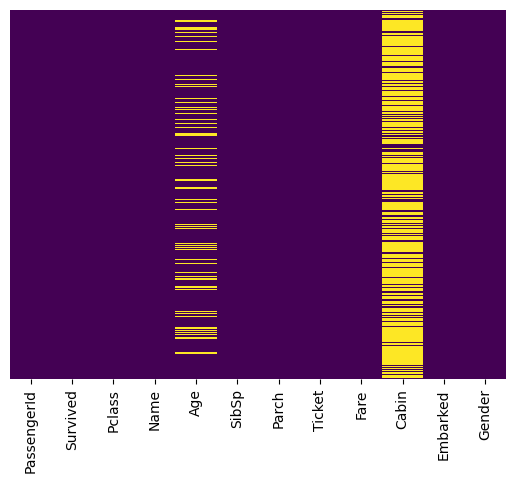

In [ ]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
titanic.drop(columns=["Cabin"],inplace = True)

In [ ]:
titanic["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic["Embarked"].isnull().sum()

2

In [ ]:
titanic.drop(columns=["PassengerId"],inplace=True)

In [ ]:
titanic["Embarked_2"]=titanic["Embarked"].map({'S':0,'C':1,'Q':2})

In [ ]:
titanic.drop(columns=["Embarked"], inplace = True)

In [ ]:
titanic["Age"]=titanic["Age"].fillna(25)

In [ ]:
titanic1["Embarked_2"]=titanic1["Embarked_2"].fillna(1.0)

/var/folders/z4/xfxb4tn914538n5tzvc68m6m0000gn/T/ipykernel_796/3594518824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic1["Embarked_2"]=titanic1["Embarked_2"].fillna(1.0)


In [ ]:
titanic.head(10)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_2
0,0,3,"Braund, Mr. Owen Harris",22.0,1.0,0,A/5 21171,7.2500,1,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0,PC 17599,65.6344,0,1.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0.0,0,STON/O2. 3101282,7.9250,0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0,113803,53.1000,0,0.0
4,0,3,"Allen, Mr. William Henry",35.0,0.0,0,373450,8.0500,1,0.0
5,0,3,"Moran, Mr. James",25.0,0.0,0,330877,8.4583,1,2.0
6,0,1,"McCarthy, Mr. Timothy J",54.0,0.0,0,17463,51.8625,1,0.0
7,0,3,"Palsson, Master. Gosta Leonard",2.5,2.5,1,349909,21.0750,1,0.0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0.0,2,347742,11.1333,0,0.0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1.0,0,237736,30.0708,0,1.0


# EDA

In [ ]:
 def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    plt.hist(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

In [ ]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Gender', 'Embarked_2'],
      dtype='object')

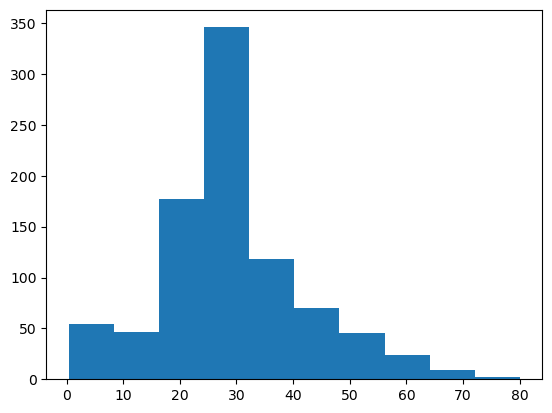

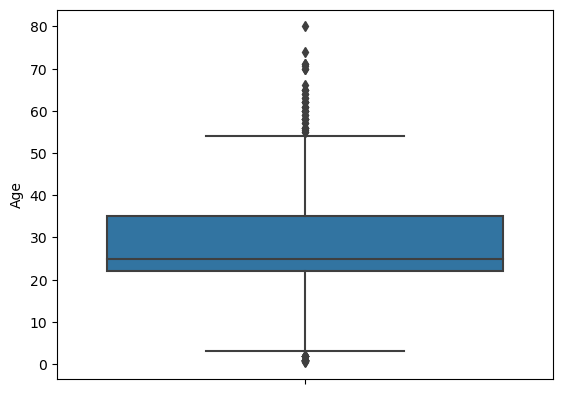

{'missing': 0,
 'min': 0.42,
 'max': 80.0,
 'mean': 28.77,
 'var': 172.57,
 'std': 13.14,
 'range': 79.58,
 'q1': 22.0,
 'q2': 25.0,
 'q3': 35.0,
 'skewness': 0.63,
 'kurtosis': 0.96}

In [ ]:
univariate_num(titanic,"Age")

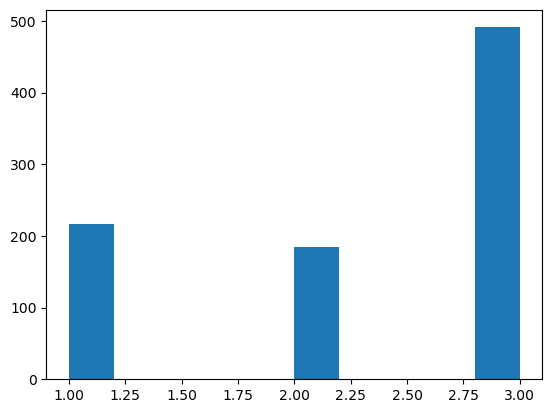

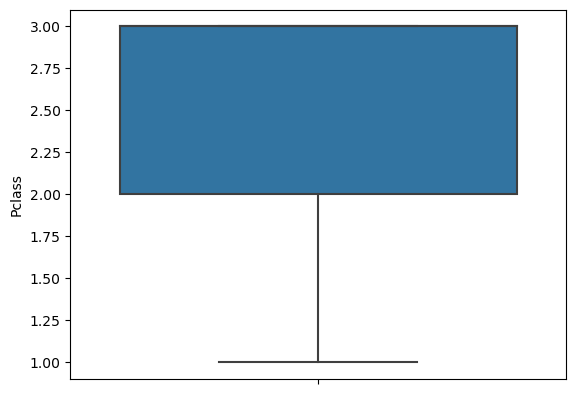

{'missing': 0,
 'min': 1,
 'max': 3,
 'mean': 2.31,
 'var': 0.7,
 'std': 0.84,
 'range': 2,
 'q1': 2.0,
 'q2': 3.0,
 'q3': 3.0,
 'skewness': -0.63,
 'kurtosis': -1.28}

In [ ]:
univariate_num(titanic,"Pclass")

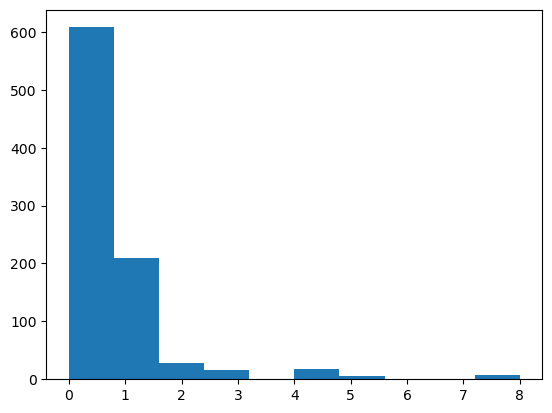

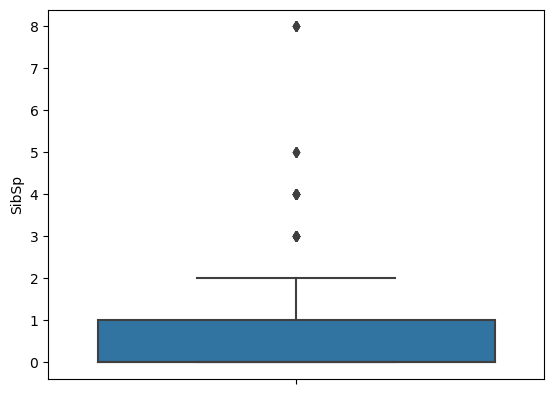

{'missing': 0,
 'min': 0,
 'max': 8,
 'mean': 0.52,
 'var': 1.22,
 'std': 1.1,
 'range': 8,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 1.0,
 'skewness': 3.7,
 'kurtosis': 17.88}

In [ ]:
univariate_num(titanic,"SibSp")

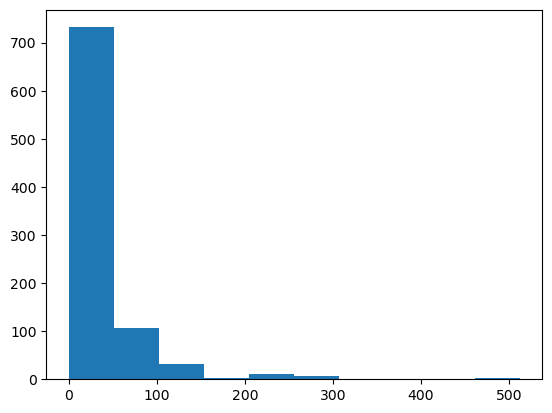

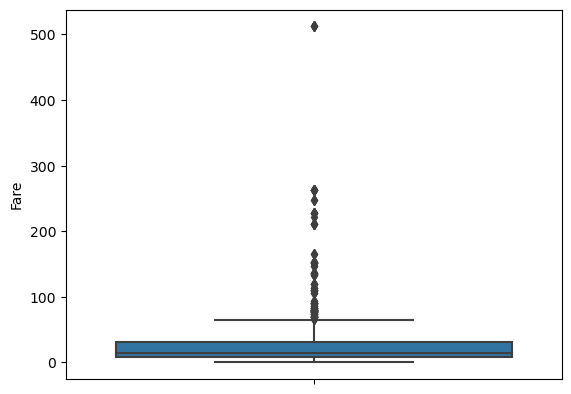

{'missing': 0,
 'min': 0.0,
 'max': 512.33,
 'mean': 32.2,
 'var': 2469.44,
 'std': 49.69,
 'range': 512.33,
 'q1': 7.91,
 'q2': 14.45,
 'q3': 31.0,
 'skewness': 4.79,
 'kurtosis': 33.4}

In [ ]:
univariate_num(titanic,"Fare")

# EXPLORING DATA WITH DIFFRENT GRAPHS


<AxesSubplot:xlabel='SibSp', ylabel='count'>

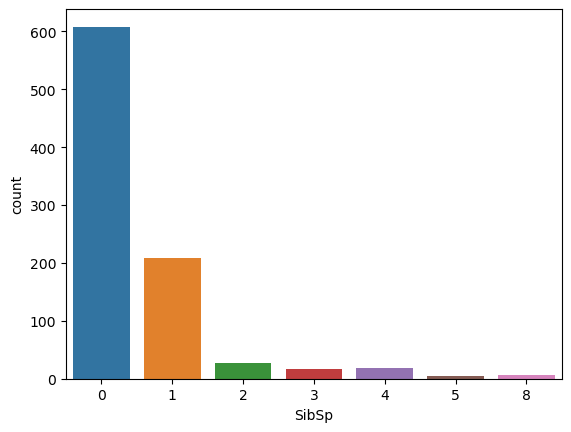

In [ ]:
sns.countplot(x='SibSp',data=titanic)

<AxesSubplot:xlabel='Age', ylabel='count'>

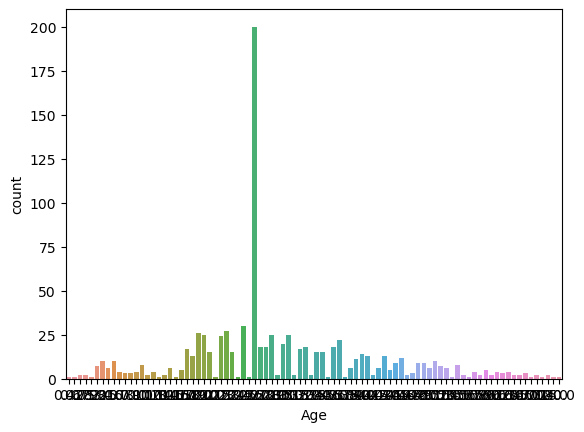

In [ ]:
sns.countplot(x='Age',data=titanic)

<AxesSubplot:xlabel='Fare', ylabel='count'>

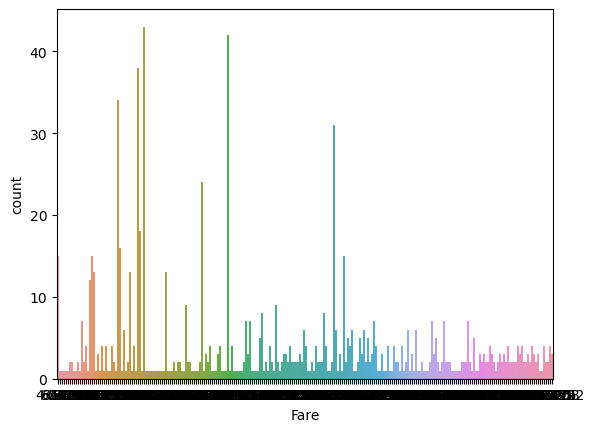

In [ ]:
sns.countplot(x='Fare',data=titanic)

<AxesSubplot:xlabel='Gender', ylabel='count'>

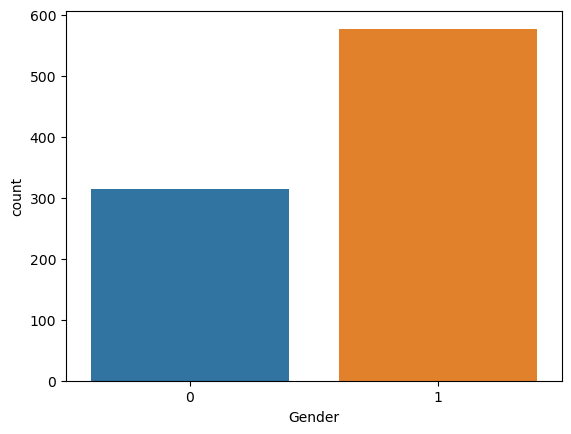

In [ ]:
sns.countplot(x='Gender',data=titanic)

<AxesSubplot:>

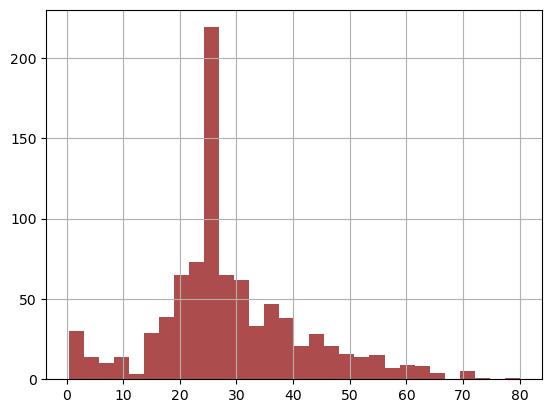

In [ ]:
titanic['Age'].hist(bins=30,color='darkred',alpha=0.7)

# OUTLIERS TREATMENT

In [ ]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Gender', 'Embarked_2'],
      dtype='object')

In [ ]:
var="SibSp"
q1=titanic[var].quantile(.25)
q3=titanic[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)
titanic[var]=np.where(titanic[var]>=upper_cap,upper_cap,titanic[var])
titanic[var]=np.where(titanic[var]<=lower_cap,lower_cap,titanic[var])

In [ ]:
var="Fare"
q1=titanic[var].quantile(.25)
q3=titanic[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)
titanic[var]=np.where(titanic[var]>=upper_cap,upper_cap,titanic[var])
titanic[var]=np.where(titanic[var]<=lower_cap,lower_cap,titanic[var])

In [ ]:
var="Age"
q1=titanic[var].quantile(.25)
q3=titanic[var].quantile(.75)
lower_cap=q1-1.5*(q3-q1)
upper_cap=q3+1.5*(q3-q1)
titanic[var]=np.where(titanic[var]>=upper_cap,upper_cap,titanic[var])
titanic[var]=np.where(titanic[var]<=lower_cap,lower_cap,titanic[var])

# CHECKING MULTICOLLINEARITY

In [ ]:
titanic.head(5)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_2
0,0,3,"Braund, Mr. Owen Harris",22.0,1.0,0,A/5 21171,7.2500,1,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0,PC 17599,65.6344,0,1.0
2,1,3,"Heikkinen, Miss. Laina",26.0,0.0,0,STON/O2. 3101282,7.9250,0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0,113803,53.1000,0,0.0
4,0,3,"Allen, Mr. William Henry",35.0,0.0,0,373450,8.0500,1,0.0


In [ ]:
titanic1=titanic[titanic.dtypes[titanic.dtypes!="object"].index]


In [ ]:
titanic1

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_2
0,0,3,22.0,1.0,0,7.2500,1,0.0
1,1,1,38.0,1.0,0,65.6344,0,1.0
2,1,3,26.0,0.0,0,7.9250,0,0.0
3,1,1,35.0,1.0,0,53.1000,0,0.0
4,0,3,35.0,0.0,0,8.0500,1,0.0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0.0,0,13.0000,1,0.0
887,1,1,19.0,0.0,0,30.0000,0,0.0
888,0,3,25.0,1.0,2,23.4500,0,0.0
889,1,1,26.0,0.0,0,30.0000,1,1.0


In [ ]:
titanic1.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Gender        0
Embarked_2    0
dtype: int64

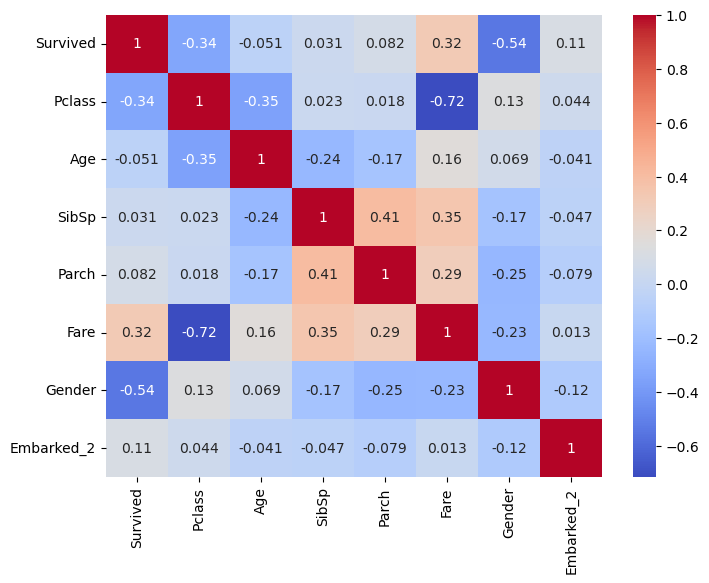

In [ ]:
cr=titanic1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cr,annot=True,cmap="coolwarm")
plt.show()

# MODEL DEPLOYMENT

In [ ]:
titanic1.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender',
       'Embarked_2'],
      dtype='object')

In [ ]:
y=titanic1["Survived"]
x=titanic1[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender',
       'Embarked_2']]

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=0)

In [ ]:
lr=LogisticRegression(max_iter=1000)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
titanic1.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Gender        0
Embarked_2    0
dtype: int64

In [ ]:
titanic1["Age"].value_counts()

Age
25.0    200
54.5     42
24.0     30
22.0     27
18.0     26
       ... 
23.5      1
36.5      1
12.0      1
14.5      1
34.5      1
Name: count, Length: 65, dtype: int64

In [ ]:
lr.score(x_train,y_train)

0.7859281437125748

In [ ]:
lr.score(x_test,y_test)

0.8116591928251121

In [ ]:
pred_train=lr.predict(x_train)

In [ ]:
pred_test=lr.predict(x_test)

In [ ]:
p=pd.DataFrame({"Pred": pred_test, "Actual":y_test})
p

,Pred,Actual
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
167,0,0
306,1,1
379,0,0
742,1,1


<AxesSubplot:>

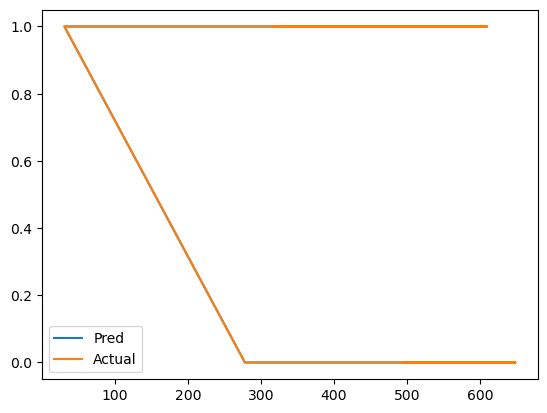

In [ ]:
p.head(10).plot()

In [ ]:
metrics.confusion_matrix(y_train, pred_train)

array([[347,  63],
       [ 80, 178]])

In [ ]:
metrics.confusion_matrix(y_test, pred_test)

array([[117,  22],
       [ 20,  64]])

In [ ]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       139
           1       0.74      0.76      0.75        84

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [ ]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       410
           1       0.74      0.69      0.71       258

    accuracy                           0.79       668
   macro avg       0.78      0.77      0.77       668
weighted avg       0.78      0.79      0.78       668



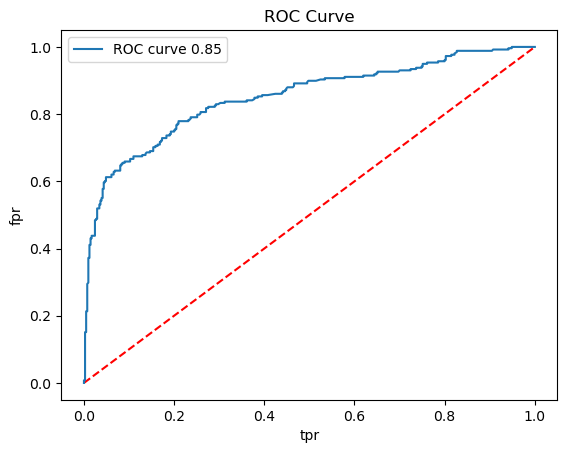

In [ ]:
probs=lr.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train, probs)

plt.plot([0,1],[0,1],color="red",linestyle="--")

auc=round(metrics.roc_auc_score(y_train,probs),2)
plt.plot(fpr,tpr, label="ROC curve "+str(auc))
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.title("ROC Curve")
plt.legend()
plt.show()